In [38]:
import pandas as pd
import os

In [39]:
adas_path = "adas_scores.csv"

In [40]:
adas_df = pd.read_csv(adas_path)

In [41]:
adas_df.head()

,ID,RID,PTID,SITEID,VISCODE,USERDATE,USERDATE2,EXAMDATE,Q1,Q2,...,Q7,Q8,Q9,Q10,Q11,Q12,Q14,TOTAL11,TOTALMOD,update_stamp
0,16500125,1412,041_S_1412,20,m12,2014-08-20,NaN,2008-07-28,5.33,0,...,0,4,0,0,0,0,0,10.33,16.33,2014-08-20 00:00:00.0
1,16500123,1412,041_S_1412,20,m06,2014-08-20,NaN,2008-02-05,5.33,0,...,0,5,0,0,0,0,1,10.33,19.33,2014-08-20 00:00:00.0
2,16500121,1412,041_S_1412,20,bl,2014-08-20,NaN,2007-07-30,3.67,0,...,0,8,0,0,1,0,1,13.67,17.67,2014-08-20 00:00:00.0
3,16500119,1411,041_S_1411,20,m06,2014-08-20,NaN,2008-03-25,6.00,0,...,0,2,0,0,0,0,1,8.00,17.00,2014-08-20 00:00:00.0
4,16500117,1411,041_S_1411,20,bl,2014-08-20,NaN,2007-08-08,4.67,0,...,0,4,0,0,0,0,0,8.67,13.67,2014-08-20 00:00:00.0


In [42]:
gmv_df = pd.read_csv("gmv.csv")
# r2f_df = pd.read_csv("r2f.csv")
# r2sn_df = pd.read_csv("r2sn.csv")
# rmcs_df = pd.read_csv("rmcs.csv")

In [43]:
gmv_df

,PTID,Unnamed: 0,diagnosis,scan_name,roi_0_gmv,roi_1_gmv,roi_2_gmv,roi_3_gmv,roi_4_gmv,roi_5_gmv,...,roi_236_gmv,roi_237_gmv,roi_238_gmv,roi_239_gmv,roi_240_gmv,roi_241_gmv,roi_242_gmv,roi_243_gmv,roi_244_gmv,roi_245_gmv
0,005_S_0324,0,MCI,latest_scan,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,127_S_0844,0,AD,latest_scan,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,023_S_1289,0,AD,latest_scan,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,023_S_0030,0,MCI,latest_scan,0,236,0,978,0,1019,...,0,0,0,0,0,0,0,0,0,0
4,016_S_1326,0,MCI,latest_scan,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,116_S_0382,0,NL,latest_scan,0,0,0,43,0,34,...,0,1,0,49,0,3,0,7,0,24
112,032_S_1169,0,NL,latest_scan,1,0,0,0,0,0,...,137,203,2,192,48,36,6,203,43,111
113,136_S_0196,0,NL,latest_scan,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,021_S_0984,0,NL,latest_scan,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# gmv_df = gmv_df.set_index("PTID")
# r2f_df = r2f_df.set_index("PTID")
# r2sn_df = r2sn_df.set_index("PTID")
# rmcs_df = rmcs_df.set_index("PTID")

In [44]:
ptid_adas_df = pd.DataFrame(columns=['PTID', 'TOTAL11'])

for ptid in gmv_df["PTID"]:

    patient_exams = adas_df.loc[adas_df['PTID'] == ptid]

    # get latest exam
    try:
        exam = patient_exams.sort_values(by='EXAMDATE', ascending=False).iloc[0]
    except:
        print(patient_exams)

    new_row = {'PTID': ptid, 'TOTAL11': exam['TOTAL11']}
    ptid_adas_df = pd.concat([ptid_adas_df, pd.DataFrame(new_row, index=[ptid])])

In [45]:
ptid_adas_df

,PTID,TOTAL11
005_S_0324,005_S_0324,10.67
127_S_0844,127_S_0844,19.00
023_S_1289,023_S_1289,26.00
023_S_0030,023_S_0030,23.00
016_S_1326,016_S_1326,17.33
...,...,...
116_S_0382,116_S_0382,2.33
032_S_1169,032_S_1169,6.33
136_S_0196,136_S_0196,8.67
021_S_0984,021_S_0984,8.33


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [47]:
gmv_filtered_df = pd.merge(ptid_adas_df, gmv_df, on = ["PTID"])
gmv_filtered_df = gmv_filtered_df.drop(columns=["scan_name", "Unnamed: 0"])

In [48]:
gmv_filtered_df.to_csv("gmv_w_adas.csv")

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='diagnosis', ylabel='TOTAL11'>

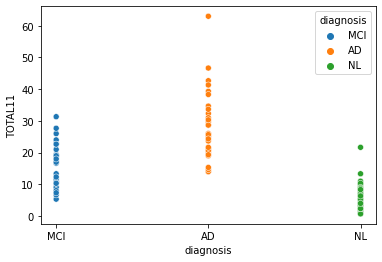

In [53]:
sns.scatterplot(x=gmv_filtered_df["diagnosis"], y=gmv_filtered_df["TOTAL11"], hue=gmv_filtered_df["diagnosis"])

In [54]:
gmv_filtered_df.head()

,PTID,TOTAL11,diagnosis,roi_0_gmv,roi_1_gmv,roi_2_gmv,roi_3_gmv,roi_4_gmv,roi_5_gmv,roi_6_gmv,...,roi_236_gmv,roi_237_gmv,roi_238_gmv,roi_239_gmv,roi_240_gmv,roi_241_gmv,roi_242_gmv,roi_243_gmv,roi_244_gmv,roi_245_gmv
0,005_S_0324,10.67,MCI,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,127_S_0844,19.00,AD,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,023_S_1289,26.00,AD,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,023_S_0030,23.00,MCI,0,236,0,978,0,1019,0,...,0,0,0,0,0,0,0,0,0,0
4,016_S_1326,17.33,MCI,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.model_selection import cross_validate

# Model

In [73]:
lr = LinearRegression()

gmv_X = gmv_filtered_df.drop(columns = ["PTID", "TOTAL11", "diagnosis"])
y = ptid_adas_df['TOTAL11']

X_train, X_test, y_train, y_test = train_test_split(gmv_X, y, test_size=0.2, random_state=42)

gmv_model = lr.fit(X_train, y_train)

In [75]:
preds = gmv_model.predict(X_test)

In [77]:
res = stats.pearsonr(preds, y_test)
res

(-0.04584280906290114, 0.8315568173153035)

<AxesSubplot:title={'center':'ADAS Preds'}, xlabel='y True', ylabel='y Pred'>

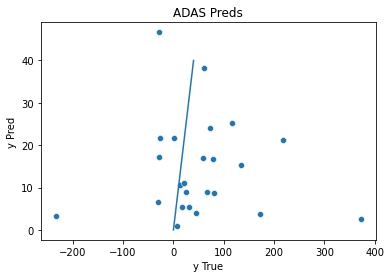

In [92]:
sns.scatterplot(x=preds, y=y_test)

# Create a DataFrame with two points
data = {'x': [0, 40], 'y': [0, 40]}
df = pd.DataFrame(data)
plt.xlabel("y True")
plt.ylabel("y Pred")
plt.title("ADAS Preds")

sns.lineplot(x='x', y='y', data=df)

In [78]:
# sklearn cross fold validation
# calculate pearson's correlation coeffecient value

cv_results = cross_validate(gmv_model, gmv_X, y, cv=3)

print(cv_results)

{'fit_time': array([0.00891638, 0.00926447, 0.01554012]), 'score_time': array([0.00391459, 0.00310326, 0.00305223]), 'test_score': array([ -19.77067338,  -21.54022232, -171.58456179])}


In [70]:
print(preds)

[10.67 19.   26.   23.   17.33  5.33 26.   10.67 13.33 19.   24.    6.67
 11.   19.33 18.67 14.   34.67 20.   25.33 39.33 23.67 28.67 32.33 14.
 20.67 26.   21.33 25.   29.67 21.33 42.67 25.67 63.   31.   14.67 33.67
 38.33 20.67 28.67 19.33 21.67 24.33 15.33 41.33 30.33 46.67  9.33  9.
 19.33  8.   21.   19.   11.67 16.67 22.67 27.67 17.   22.67 31.33 12.33
  7.33 18.   10.33 10.33  2.   13.33  7.    1.    8.33  6.33 21.67  7.
  3.33 11.    6.67  6.    1.    4.67  3.    1.33  5.    2.67  9.67  4.
  3.67  3.33  4.    5.33  2.67  1.67  8.33  0.67  4.    3.67  8.67  7.67
  9.    6.67 10.    2.33  5.33  2.33  7.33 10.    7.    5.   10.33  3.
  3.33  9.    5.33  2.33  6.33  8.67  8.33  4.  ]


In [71]:
print(gmv_filtered_df["TOTAL11"])

0      10.67
1      19.00
2      26.00
3      23.00
4      17.33
       ...  
111     2.33
112     6.33
113     8.67
114     8.33
115     4.00
Name: TOTAL11, Length: 116, dtype: float64


In [59]:
gmv_model.predict(gmv_X[gmv_filtered_df["PTID"] == "126_S_0606"])

array([20.67])